# Activation functions

## Motivation

Deep learning is fundamentally a method of scalably building and training nonlinear models on large datasets. We've already achieved robust linear model performance for linearly separable datasets, using the Perceptron algorithm. To make these models useful in more complex datasets, we need to build in nonlinearity.

An _activation function_ (represented commonly and here as $\phi$) takes the output value of a linear function such as $w^T x + b$ and returns a nonlinear transformation of that value. This behavior has biological origins:

### Biological neurons

Biological neurons receive signals via _dendrites_ and output signals via an _axon_, which in turn passes signals across synapses to the _dendrites_ of other neurons. Neurons _fire_ by sending a voltage spike along the axon. The frequency of voltage spikes along the axon is a neuron's _firing rate_. The deep learning analogue of a neuron's _firing rate_ is an _activation function_:

| Biological | Artificial |
|-----------------|---------------|
| Neuron firing rate | Activation function $\phi$ |
| Voltage spike | $\phi(x)$
| Axon signal | $x$ |
| Synaptic strength | $w^T$ |

## Fundamental equations

In deep learning, an activation function $\phi : \mathbb{R} \rightarrow \mathbb{R} $ is usually set to one of the following.


### Logistic sigmoid
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$
The _sigmoid_ non-linearity takes an input $x \in \mathbb{R}$ and squashes it into an output $ 0 \leq \sigma(x) \leq 1$. The sigmoid _saturates_ with a very positive or very negative $x$; at extreme values of $x$, it becomes flat and varies only very slightly in response to small changes of $x$.

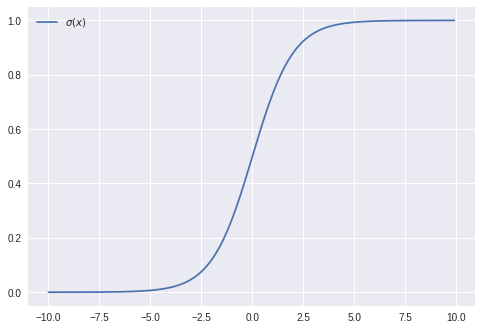

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10., 10., 0.1)
sigmoid = lambda x: 1/(1+np.exp(-x))
plt.plot(X, [sigmoid(x) for x in X], label='$\sigma(x)$')
plt.legend();

### Hyperbolic tangent
\begin{align*}
tanh(x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{align*}
The _tanh_ non-linearity also takes an input $x \in \mathbb{R}$ and squashes it into an output $ -1 \leq \sigma(x) \leq 1$. Like the logistic sigmoid,  _tanh_ saturates at extreme values of $x$. Unlike the logistic sigmoid, the _tanh_ function is centered at $0$. This makes sense because the _tanh_ function is actually just a scaled sigmoid:
\begin{align*}
tanh(x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
&= \frac{1-e^{-2x}}{1+e^{-2x}} \\
&= \frac{2}{1+e^{-2x}}-1 \\
&= 2\sigma(2x)-1
\end{align*}

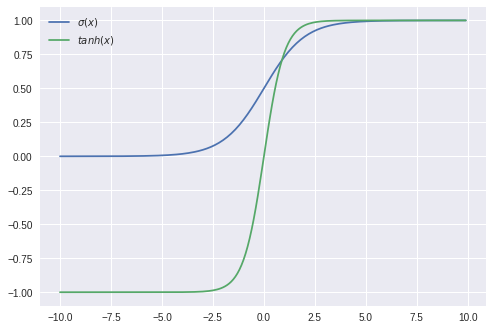

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10., 10., 0.1)
def tanh(x):
  u = np.exp(x)
  v = 1/u
  return (u-v)/(u+v)
  
plt.plot(X, [sigmoid(x) for x in X], label='$\sigma(x)$')
plt.plot(X, [tanh(x) for x in X], label='$tanh(x)$')
plt.legend();

### Rectified linear unit
$$
g(x) = max(0, x)
$$

The rectified linear unit (_ReLU_) thresholds the activation at $0$. The _ReLU_ function, consisting of no exponential operations, is easier and faster to compute than the logistic sigmoid or hyperbolic tangent activation functions. The _ReLU_ also does not saturate at extreme values, instead simply behaving linearly.

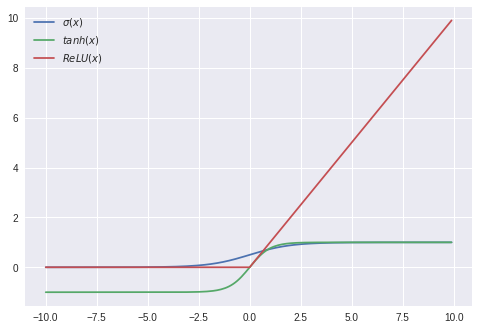

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-5., 5., 0.1)
relu = lambda x: max(0, x)
  
plt.plot(X, [sigmoid(x) for x in X], label='$\sigma(x)$')
plt.plot(X, [tanh(x) for x in X], label='$tanh(x)$')
plt.plot(X, [relu(x) for x in X], label='$ReLU(x)$')
plt.legend();

### Usage

In [Linear models](TODO) we discussed the behavior of a a linear model defined by a weight vector $w$, a bias term $b$, and an input vector $x$:
$$
w^T x + b
$$
We can pass the output of this linear model to any one of our activation functions above:
$$
h = \phi(w^T x + b)
$$
and now have achieved nonlinear behavior.